<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/universial_approximation_thm_demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

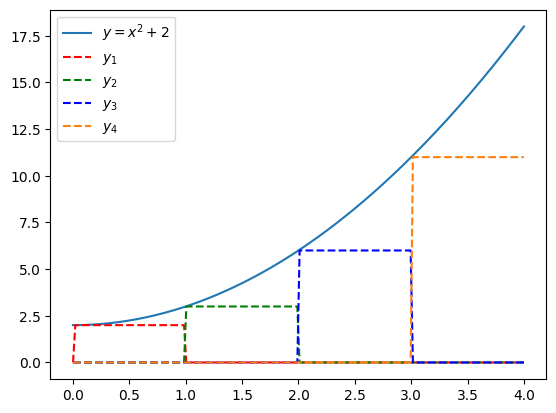

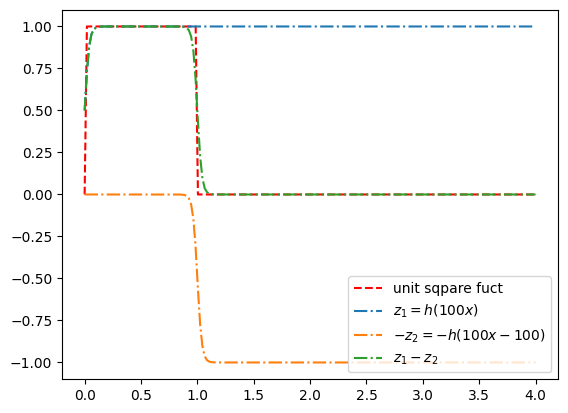

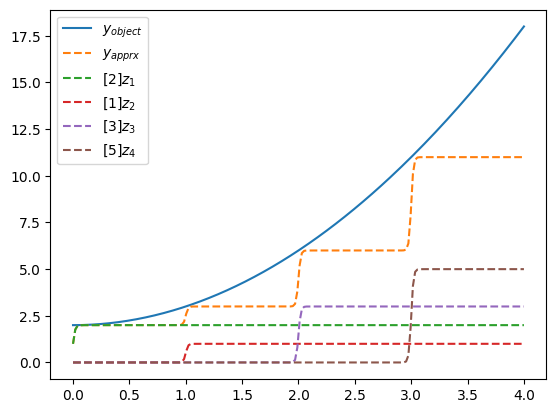

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 15 04:04:26 2025

@author: kcshi
"""
import numpy as np
import matplotlib.pyplot as plt

phi      = lambda u: 1 / (1 + np.exp(-u))
y_object = lambda x: x**2  + 2 #근사하고자 하는 함수

x = np.linspace(0, 4, 200).reshape(-1,1)
yy = y_object(x)

# square functions
y1 = y_object(0)*np.array((0 < x) & (x < 1), dtype=float)
y2 = y_object(1)*np.array((1 < x) & (x < 2), dtype=float)
y3 = y_object(2)*np.array((2 < x) & (x < 3), dtype=float)
y4 = y_object(3)*np.array((3 < x) , dtype=float)

plt.figure()
plt.plot(x,yy,'-',  label=r'$y = x^2+2$')
plt.plot(x,y1,'r--',label=r'$y_1$')
plt.plot(x,y2,'g--',label=r'$y_2$')
plt.plot(x,y3,'b--',label=r'$y_3$')
plt.plot(x,y4,'--', label=r'$y_4$')
plt.legend()
plt.show()


#approximation of a unit square function by two logistic functions
sqrt_fct = np.array((0 < x) & (x < 1), dtype=float)
plt.figure()
plt.plot(x,sqrt_fct ,'r--',label='unit sqpare fuct')
plt.plot(x,phi(50*x),'-.',label=r'$z_1=h(100x)$')
plt.plot(x,-phi(50*x-50),'-.',label=r'$-z_2=-h(100x-100)$')
plt.plot(x,phi(50*x) -phi(50*x-50),'-.',label=r'$z_1-z_2$')
plt.legend(loc='lower right')
plt.show()



xx = np.linspace(0, 4, 200).reshape(-1,1)
W1 = np.ones([1,4]) * 100
B1 = np.array([[0,-100,-200,-300]]) #1by2 matrix
W2 = np.array([[y_object(0)],
               [y_object(1) - y_object(0)],
               [y_object(2) - y_object(1)],
               [y_object(3) - y_object(2)]
               ]) #2by1 matrix
B2 = np.array([[0]])

#forward propagation
A = xx*W1 + B1
Z = phi(A)
y_apprx= np.matmul(Z,W2) + B2

plt.figure()
plt.plot(xx,yy,'-',label=r'$y_{object}$')
plt.plot(xx, y_apprx,'--', label=r'$y_{apprx}$')

plt.plot(xx,W2[0]*Z[:,0],'--',label=r'${:}z_1$'.format(W2[0]))
plt.plot(xx,W2[1]*Z[:,1],'--',label=r'${:}z_2$'.format(W2[1]))
plt.plot(xx,W2[2]*Z[:,2],'--',label=r'${:}z_3$'.format(W2[2]))
plt.plot(xx,W2[3]*Z[:,3],'--',label=r'${:}z_4$'.format(W2[3]))
plt.legend()
plt.show()


